In [161]:
import pandas as pd
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [162]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [163]:
for index, row in data_info.iterrows():
    print(index, ':\n\t', data_info.loc[index]['Description'])


loan_amnt :
	 The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term :
	 The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate :
	 Interest Rate on the loan
installment :
	 The monthly payment owed by the borrower if the loan originates.
grade :
	 LC assigned loan grade
sub_grade :
	 LC assigned loan subgrade
emp_title :
	 The job title supplied by the Borrower when applying for the loan.*
emp_length :
	 Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership :
	 The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc :
	 The self-reported annual income provided by the borrower during registration.
verification_status :
	 Indicates if

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [165]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [167]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [168]:
print(df.isna().sum()*100/df.shape[0])

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64


In [169]:
print(df['loan_status'].value_counts())
fully_paid_rows = df[df['loan_status'] == 'Fully Paid']
num_rows_to_drop = int(len(fully_paid_rows) *0.75)
random_half_to_drop = fully_paid_rows.sample(n=num_rows_to_drop, random_state=42)
df.drop(random_half_to_drop.index, inplace=True)

print(df['loan_status'].value_counts())

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64
loan_status
Fully Paid     79590
Charged Off    77673
Name: count, dtype: int64


In [170]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)
numeric_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc','mort_acc', 'loan_status', 'pub_rec_bankruptcies']
categoric_columns = ['address',
 'application_type',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'issue_d',
 'purpose',
 'sub_grade',
 'term',
 'title',
 'verification_status']

df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,157263.0,14458.357020,8420.065572,500.00,8000.00,12300.00,20000.000,40000.00
int_rate,157263.0,14.466852,4.575701,5.32,11.26,14.09,17.570,30.99
installment,157263.0,438.618147,250.003207,16.47,259.04,383.00,574.085,1533.81
annual_inc,157263.0,71700.043571,65816.309187,0.00,44500.00,60000.00,85000.000,8706582.00
dti,157263.0,18.229146,26.822489,0.00,12.00,17.78,23.960,9999.00
open_acc,157263.0,11.413060,5.197511,0.00,8.00,11.00,14.000,90.00
pub_rec,157263.0,0.185644,0.575632,0.00,0.00,0.00,0.000,86.00
revol_bal,157263.0,15637.484882,19281.546781,0.00,6074.00,11209.00,19542.000,1030826.00
revol_util,157141.0,55.297153,24.165562,0.00,37.80,56.60,74.200,152.50
total_acc,157263.0,25.226811,11.887468,2.00,17.00,24.00,32.000,151.00


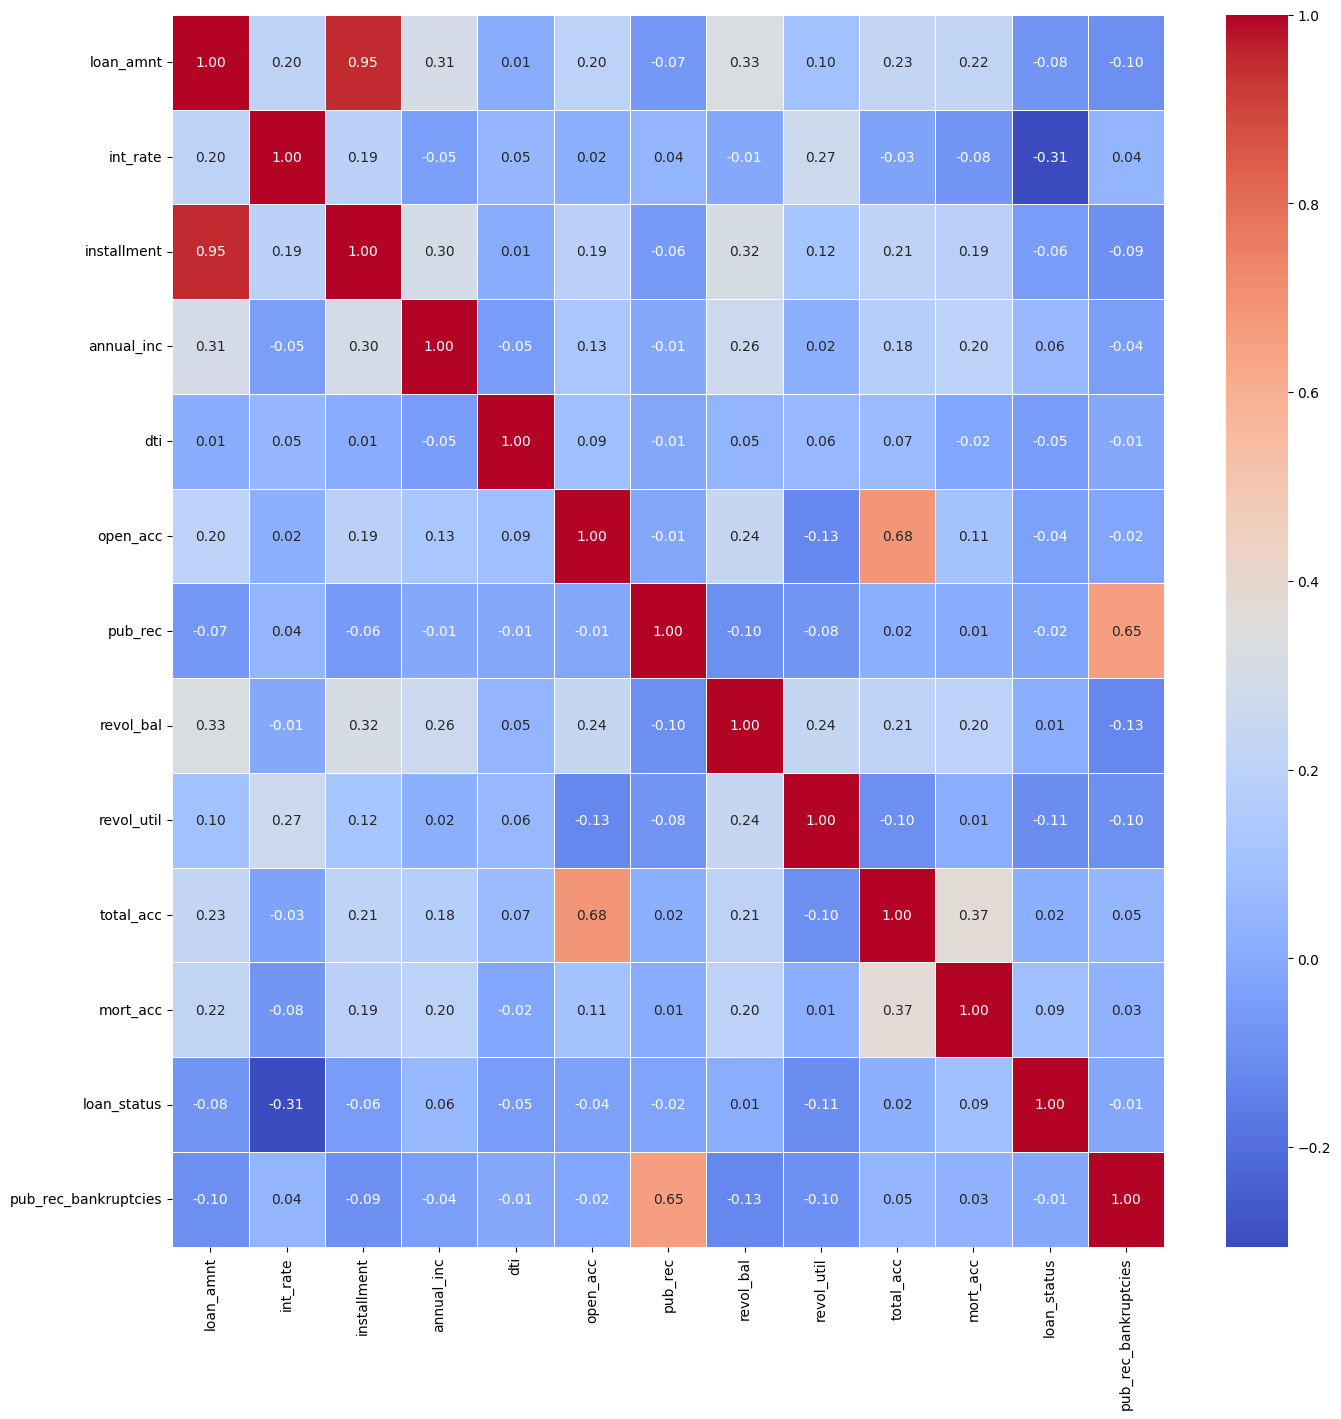

In [171]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [172]:
for col in categoric_columns:
    print(col,': ',df[col].nunique())
    if df[col].nunique()<40:
        print(df[col].unique())

address :  156836
application_type :  3
['INDIVIDUAL' 'DIRECT_PAY' 'JOINT']
earliest_cr_line :  648
emp_length :  11
['9 years' '2 years' '3 years' '8 years' '10+ years' '7 years' '< 1 year'
 '6 years' nan '4 years' '5 years' '1 year']
emp_title :  77451
grade :  7
['C' 'A' 'E' 'B' 'D' 'F' 'G']
home_ownership :  6
['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE' 'ANY']
initial_list_status :  2
['f' 'w']
issue_d :  114
purpose :  14
['credit_card' 'home_improvement' 'debt_consolidation' 'small_business'
 'major_purchase' 'medical' 'other' 'wedding' 'car' 'moving' 'house'
 'educational' 'vacation' 'renewable_energy']
sub_grade :  35
['C5' 'A1' 'A2' 'A5' 'E4' 'A4' 'A3' 'B5' 'C2' 'B1' 'D3' 'B4' 'D1' 'D5'
 'E1' 'F4' 'E2' 'D4' 'D2' 'G1' 'C1' 'F5' 'G2' 'C4' 'F1' 'F3' 'B2' 'E5'
 'C3' 'E3' 'B3' 'G4' 'F2' 'G3' 'G5']
term :  2
[' 60 months' ' 36 months']
title :  20550
verification_status :  3
['Verified' 'Source Verified' 'Not Verified']


In [173]:
df['earliest_cr_line']

4         Mar-1999
6         Aug-2005
9         Dec-1997
14        May-2001
15        Sep-1994
            ...   
396015    Dec-1977
396019    May-2002
396020    Jan-1988
396023    May-1998
396025    Nov-2004
Name: earliest_cr_line, Length: 157263, dtype: object

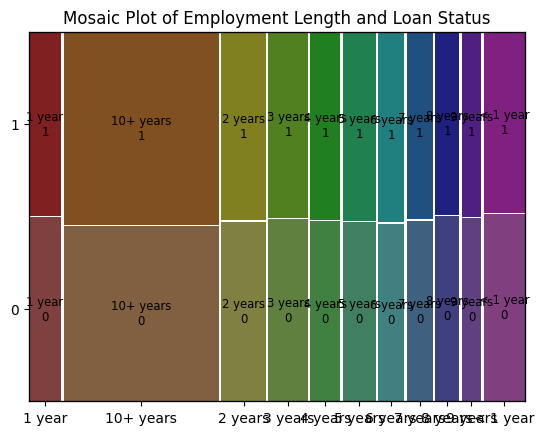

In [174]:
from statsmodels.graphics.mosaicplot import mosaic
charge_off_percentage = df.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()[0] * 100
charge_off_percentage
ct = pd.crosstab(df['emp_length'], df['loan_status'])
mosaic(ct.stack(), title='Mosaic Plot of Employment Length and Loan Status')
plt.show()

In [175]:
df.drop(columns=['emp_title', 'emp_length', 'title'], inplace=True)
categoric_columns = [col for col in categoric_columns if col not in ['emp_title', 'emp_length', 'title']]

In [176]:
values = {}
for col in numeric_columns:
    values[col] = df[col].quantile(0.9999)

for col in numeric_columns:
    df = df[df[col]<= values[col]]


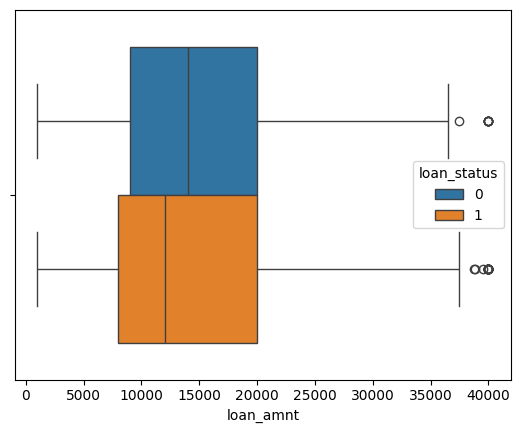

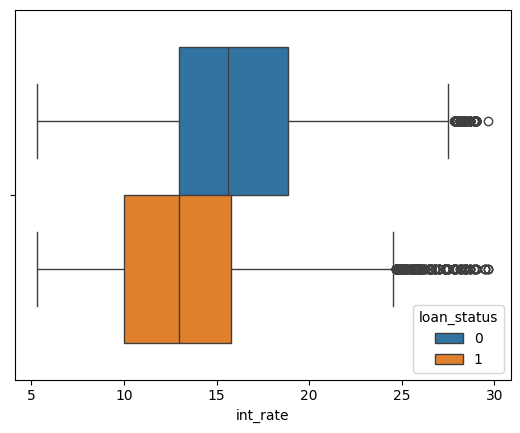

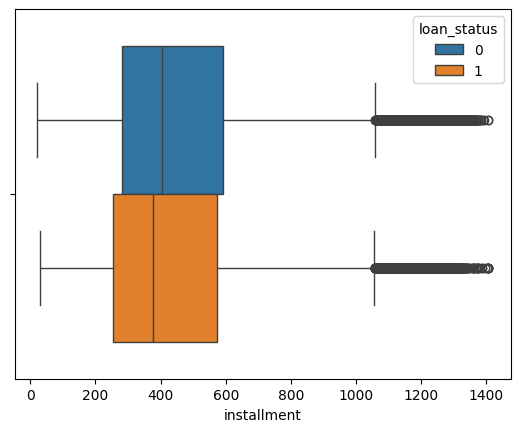

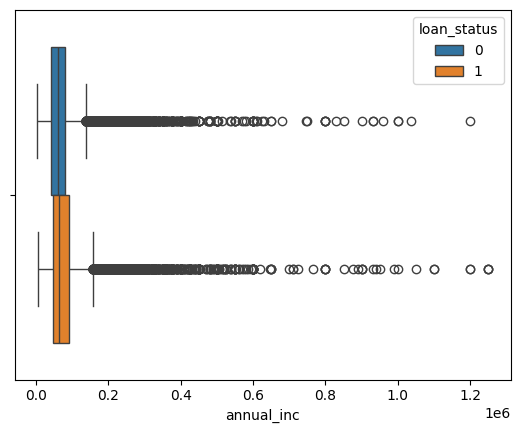

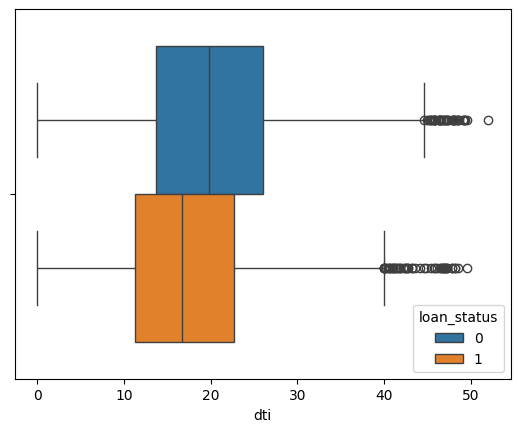

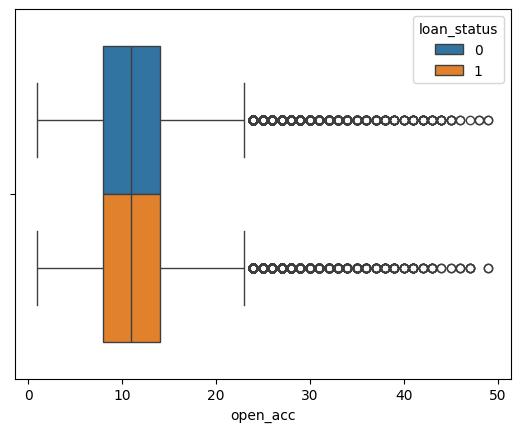

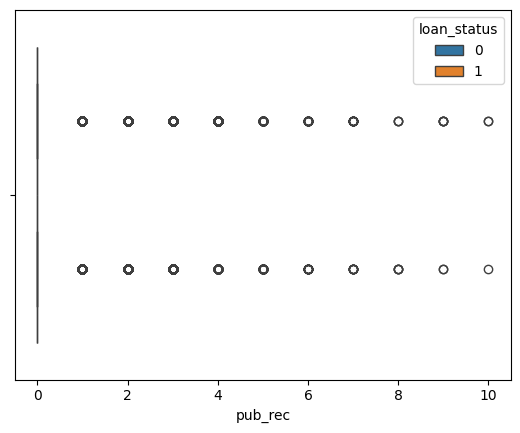

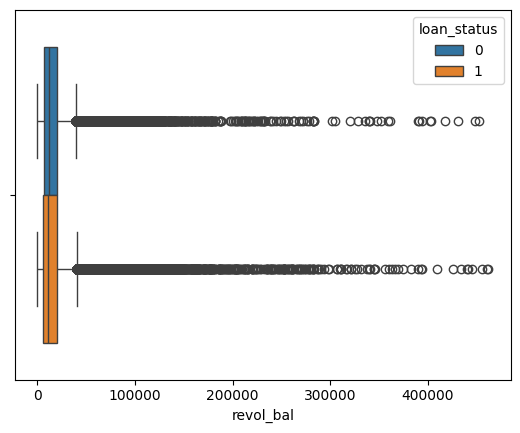

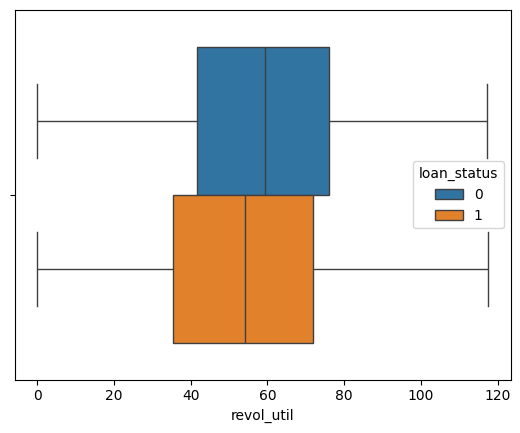

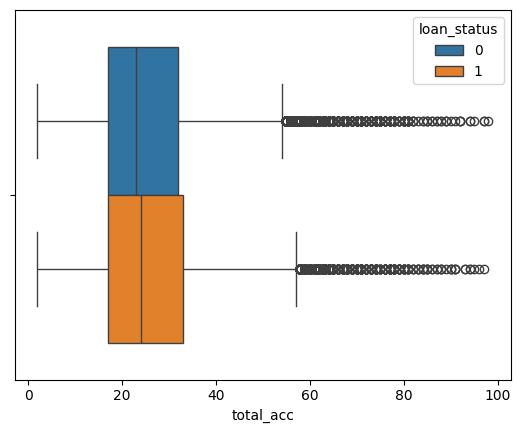

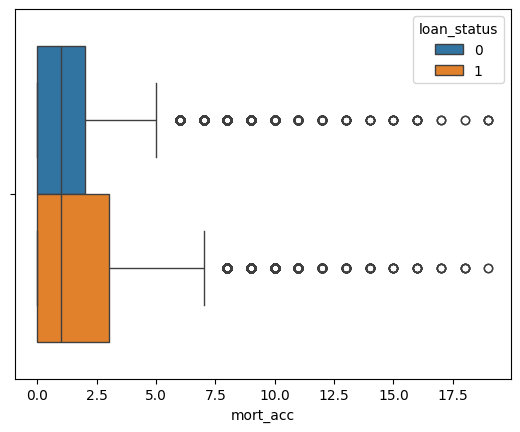

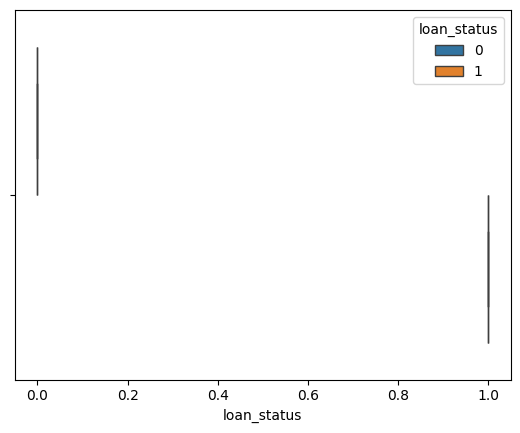

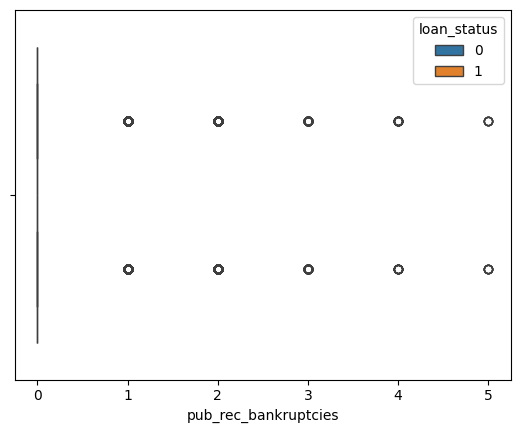

In [177]:
for col in numeric_columns:
    sns.boxplot(data=df, x=col, hue='loan_status')
    plt.show()

In [178]:
# Assuming you have a DataFrame named 'df' containing the necessary columns
# 'total_acc' and 'mort_acc'

def fill_missing_mort_acc(row, mean_mort_acc_by_total_acc):
    if pd.isnull(row['mort_acc']):
        return mean_mort_acc_by_total_acc[row['total_acc']]
    else:
        return row['mort_acc']

mean_mort_acc_by_total_acc = df.groupby('total_acc')['mort_acc'].median()

df['mort_acc'] = df.apply(lambda row: fill_missing_mort_acc(row, mean_mort_acc_by_total_acc), axis=1)
mean_mort_acc_by_total_acc

total_acc
2.0     0.0
3.0     0.0
4.0     0.0
5.0     0.0
6.0     0.0
       ... 
94.0    3.5
95.0    0.5
96.0    4.0
97.0    5.0
98.0    0.0
Name: mort_acc, Length: 97, dtype: float64

In [179]:
df.dropna(inplace=True)
print(df.shape)


(143341, 24)


Categorical data

In [180]:
for col in categoric_columns:
    print(col,': ',df[col].nunique())
    if df[col].nunique()<80:
        print(df[col].value_counts())

df['home_ownership'] = df['home_ownership'].str.replace('NONE', 'OTHER')
df['home_ownership'] = df['home_ownership'].str.replace('ANY', 'OTHER')

address :  142998
application_type :  3
application_type
INDIVIDUAL    143072
DIRECT_PAY       148
JOINT            121
Name: count, dtype: int64
earliest_cr_line :  647
grade :  7
grade
C    40365
B    35846
D    27529
A    16218
E    15438
F     6209
G     1736
Name: count, dtype: int64
home_ownership :  6
home_ownership
MORTGAGE    68702
RENT        60485
OWN         14125
OTHER          15
NONE           13
ANY             1
Name: count, dtype: int64
initial_list_status :  2
initial_list_status
f    80195
w    63146
Name: count, dtype: int64
issue_d :  58
issue_d
Oct-2014    6411
Jul-2014    5371
Jan-2015    5136
Jul-2015    4490
Apr-2015    4169
Nov-2014    3842
Dec-2013    3837
Nov-2013    3825
May-2015    3787
Apr-2014    3737
May-2014    3720
Oct-2013    3681
Jan-2014    3639
Oct-2015    3466
Sep-2013    3457
Mar-2014    3394
Aug-2014    3367
Aug-2013    3331
Mar-2015    3304
Jun-2014    3242
Jul-2013    3238
Feb-2015    3222
Feb-2014    3147
Aug-2015    3119
Jun-2015    3078
J

In [181]:
df['earliest_cr_line'] = df['earliest_cr_line'].str[-4:]

df['zip_code'] = df['address'].str.extract(r'([A-Za-z]{2} \d{5})')
df['address'] = df['address'].str.replace(r'[A-Za-z]{2} \d{5}', '', regex=True).str.strip()
df['address'] = df['address'].str.replace(',', '', regex=True).str.strip()
df['state'] = df['zip_code'].str[:2]
df['zip_code'] = df['zip_code'].str[-5:]


df[['street', 'city']] = df['address'].str.split('\n', n=1, expand=True)

categoric_columns.append('street')
categoric_columns.append('city')
categoric_columns.append('state')
categoric_columns = [col for col in categoric_columns if col not in ['issue_month', 'address']]

for col in categoric_columns:
    df[col] = df[col].str.lower()
    df[col] = df[col].str.strip()


In [182]:
sorted(df.columns)
df.drop(columns=['address', 'issue_d', 'grade'], inplace=True)

In [183]:
df['zip_code'] = df['zip_code'].astype(int)
df['earliest_cr_line'] = df['earliest_cr_line'].astype(int)
categoric_columns.remove('earliest_cr_line')
categoric_columns.remove('grade')
categoric_columns.remove('issue_d')

df[categoric_columns]

,application_type,home_ownership,initial_list_status,purpose,sub_grade,term,verification_status,street,city,state
4,individual,mortgage,f,credit_card,c5,60 months,verified,679 luna roads,greggshire,va
6,individual,mortgage,f,home_improvement,a1,36 months,source verified,1008 erika vista suite 748,east stephanie,tx
9,individual,mortgage,f,debt_consolidation,c5,36 months,verified,3390 luis rue,mauricestad,va
14,individual,mortgage,f,small_business,a2,36 months,verified,0472 weber manors apt. 660,lake andrew,nh
15,individual,mortgage,w,major_purchase,a5,36 months,not verified,11629 sean hills suite 614,stevenfort,hi
...,...,...,...,...,...,...,...,...,...,...
396015,individual,mortgage,w,other,b2,36 months,not verified,unit 4067 box 2110,dpo,aa
396019,individual,rent,f,debt_consolidation,b5,36 months,source verified,5271 richard pass suite 500,port melissamouth,nc
396020,individual,rent,w,debt_consolidation,b3,36 months,not verified,914 alexander mountains apt. 604,east marco,vt
396023,individual,mortgage,f,debt_consolidation,d4,36 months,not verified,0297 flores dale suite 441,taylorland,md


In [184]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categoric_columns:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()



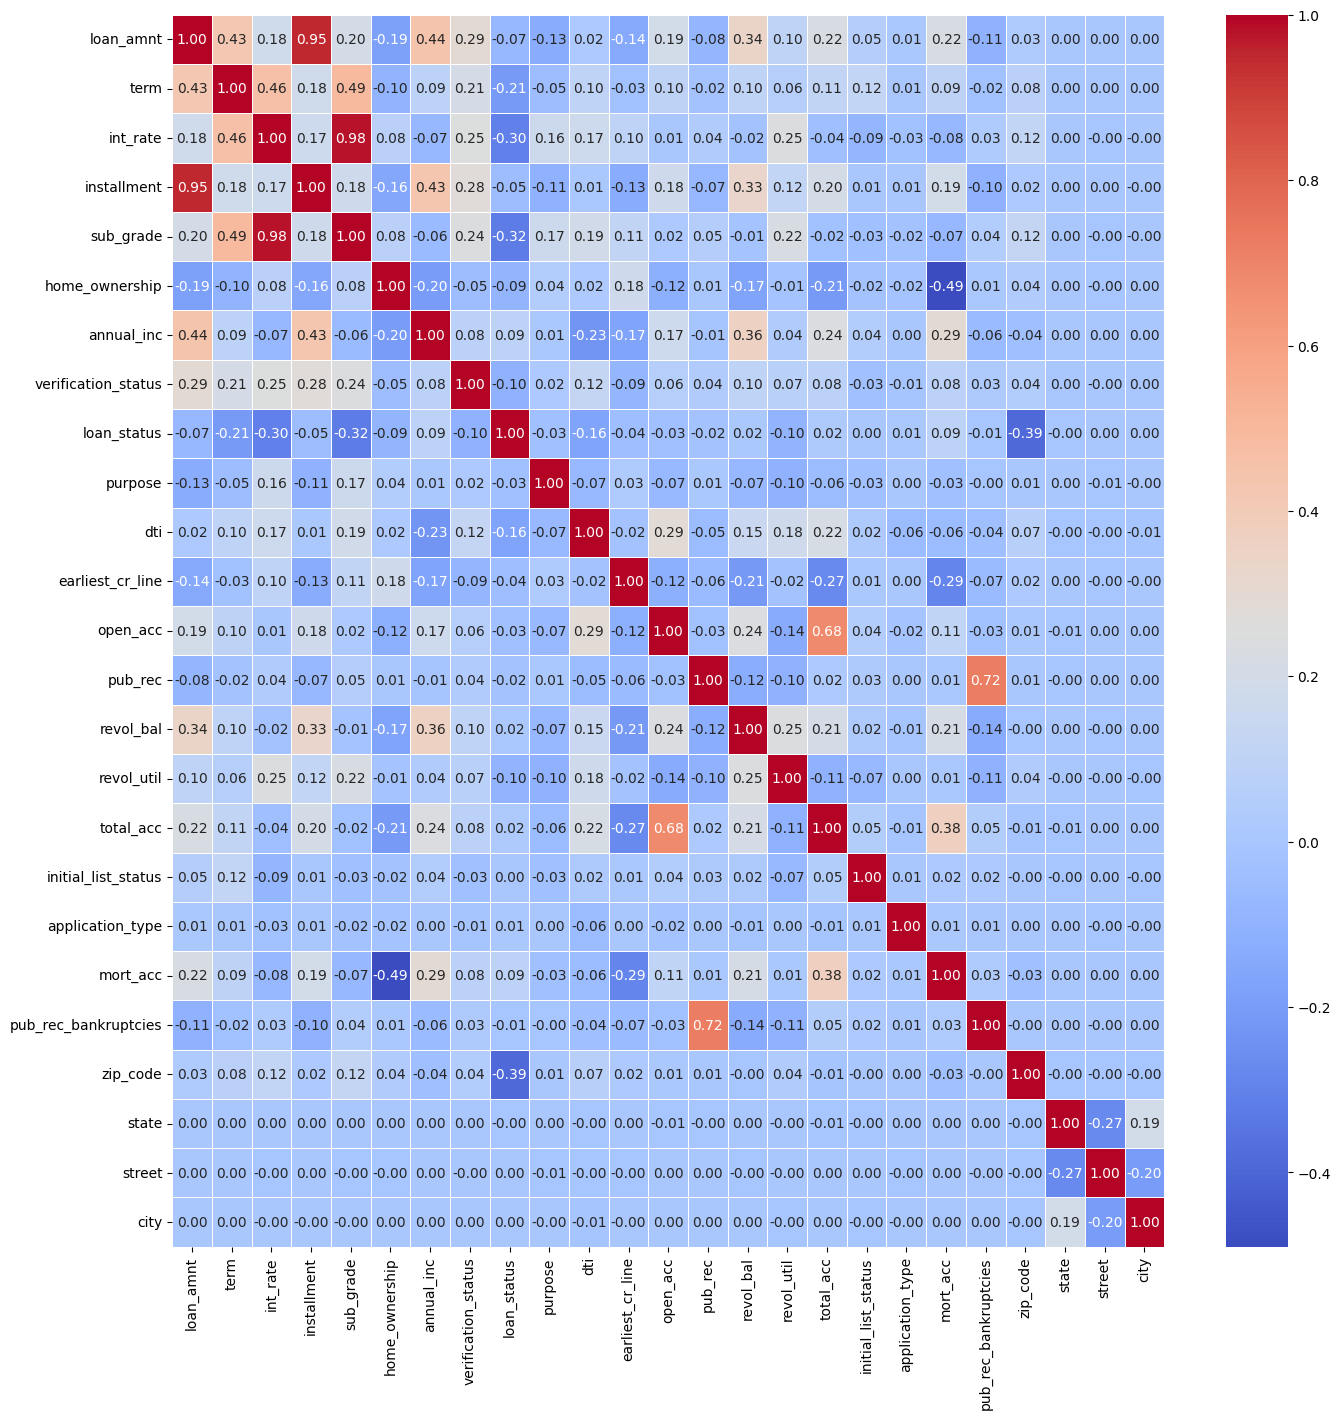

In [185]:
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()


In [186]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

print(y_train.sum())
print(y_test.sum())
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

57070
14270


Model

In [187]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

In [188]:
df.shape

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# input layer
model.add(Dense(df.shape[1],  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(int(0.9*df.shape[1]), activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(int(0.5*df.shape[1]), activation='relu'))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')
"""for a in range(2,10):
    print(df.shape[0]/(a*(df.shape[1]+1)), end=f'=>{a},  ')
"""

model.fit(
    x=X_train, 
    y=y_train, 
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
    )

Epoch 1/20


896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6227 - val_loss: 0.5518
Epoch 2/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5601 - val_loss: 0.5249
Epoch 3/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5333 - val_loss: 0.4600
Epoch 4/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4662 - val_loss: 0.4169
Epoch 5/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4376 - val_loss: 0.4067
Epoch 6/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4260 - val_loss: 0.4009
Epoch 7/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4192 - val_loss: 0.3990
Epoch 8/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4174 - val_loss: 0.3955
Epoch 9/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4150 - val_loss: 0.3955
Epoch 10/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - loss: 0.4089 - val_loss: 0.3934
Epoch 11/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4076 - val_loss: 0.3937
Epoch 12/20
896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 

In [189]:
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 25)             │           625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 22)             │           572 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 22)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 12)             │           276 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,460 (17.43 KB)

 Trainable params: 1,486 (5.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,974 (11.62 KB)

None


In [190]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5')  


<Axes: >

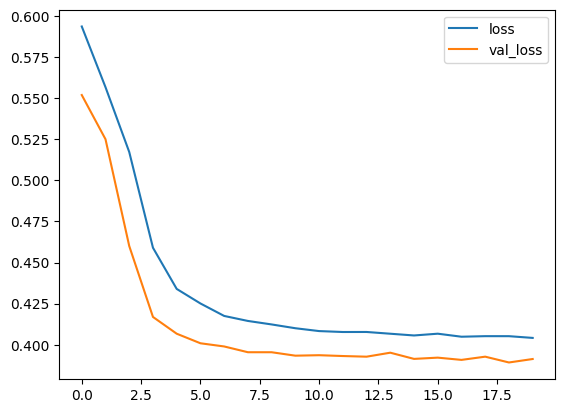

In [191]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [192]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) 
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)


896/896 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step
              precision    recall  f1-score   support

           0       0.80      0.77      0.79     14399
           1       0.78      0.81      0.79     14270

    accuracy                           0.79     28669
   macro avg       0.79      0.79      0.79     28669
weighted avg       0.79      0.79      0.79     28669



array([[11127,  3272],
       [ 2751, 11519]])

Precision:
    -For class 0 (negative class), the precision is 0.80, indicating that out of all samples predicted as class 0, 80% were correctly classified.
    -For class 1 (positive class), the precision is 0.78, indicating that out of all samples predicted as class 1, 78% were correctly classified.



Recall:
    -For class 0, the recall is 0.77, indicating that the model correctly identified 77% of all actual class 0 samples.
    -For class 1, the recall is 0.81, indicating that the model correctly identified 81% of all actual class 1 samples.



F1-score:
    -The F1-score is the harmonic mean of precision and recall.
    -For both classes, the F1-score is 0.79, indicating a balance between precision and recall.



Accuracy: The overall accuracy of the model is 0.79, meaning that it correctly predicted 79% of all samples.



Confusion Matrix: The confusion matrix provides a breakdown of correct and incorrect predictions for each class. For example, there are 11127 true negatives (TN), 3272 false positives (FP), 2751 false negatives (FN), and 11519 true positives (TP).



Analysis:
    The model demonstrates balanced performance with similar precision, recall, and F1-score for both classes.
    The overall accuracy of 0.79 indicates that the model performs reasonably well across all samples.